# Image classifier to check if it is an eagle or hawk

In [1]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search fastbook

## Download images of eagles and hawks

Create search_images function to download images

In [2]:
from fastbook import *

def search_images(term, max_images=10):
    print(f"Search for '{term}'")
    return L(search_images_ddg(term, max_images))

Search image and viewing the url of it

In [3]:
urls = search_images('eagle photos', max_images=1)
urls[0]

Search for 'eagle photos'


'http://2.bp.blogspot.com/-RpG52To2p8o/Ut4r3hTBTeI/AAAAAAAAO28/0a_NvPStumQ/s1600/194_1spread_eagle_.jpg'

save and download from the url then viewing the image

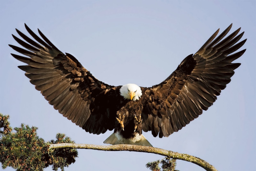

In [4]:
from fastdownload import download_url
dest = 'eagle.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256, 256)

Now doing the same for a hawk photo

Search for 'hawk photos'


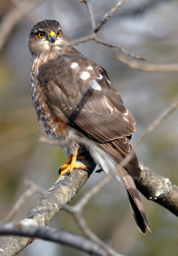

In [5]:
download_url(search_images('hawk photos', max_images=1)[0], 'hawk.jpg', show_progress=False)
Image.open('hawk.jpg').to_thumb(256, 256)

few examples of these images and save them in a different folder

In [6]:
searches = 'eagle', 'hawk'
path = Path('eagle_or_hawk')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} flying photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} sitting photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Search for 'eagle photo'
Search for 'eagle flying photo'
Search for 'eagle sitting photo'
Search for 'hawk photo'
Search for 'hawk flying photo'
Search for 'hawk sitting photo'


# Train the model

remove images that were not downloaded properly

In [7]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

To train a model, we'll need `DataLoaders`, which is an object that contains a *training set* (the images used to create a model) and a *validation set* (the images used to check the accuracy of a model -- not used during training). View sample images from it.

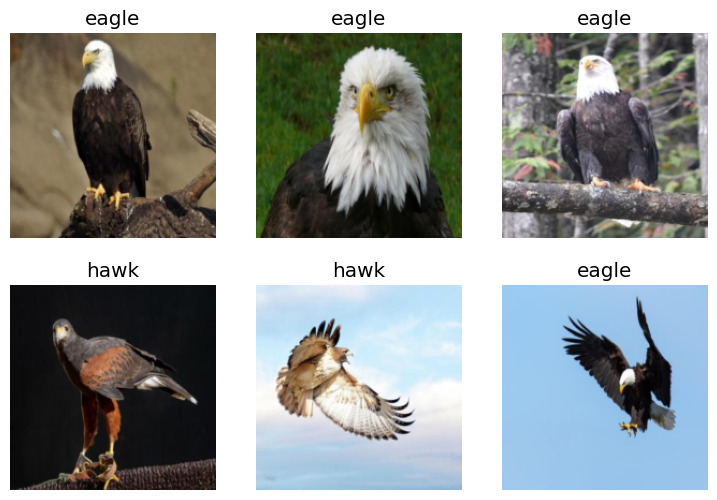

In [8]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

Using pre-trained model resnet, the model is fine tuned

In [9]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.090695,0.388976,0.166667,00:14


epoch,train_loss,valid_loss,error_rate,time
0,0.417687,0.279466,0.083333,00:22
1,0.303845,0.294387,0.055556,00:21
2,0.202491,0.296583,0.027778,00:21


using this model, the image is checked to see its accuracy

This is an eagle: eagle.
Probability of an eagle image: 0.9976


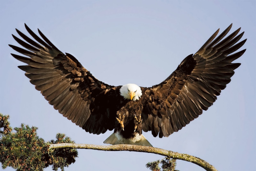

In [10]:
is_eagle,_,probs = learn.predict(PILImage.create('eagle.jpg'))
print(f"This is an eagle: {is_eagle}.")
print(f"Probability of an eagle image: {probs[0]:.4f}")
Image.open('eagle.jpg').to_thumb(256, 256)